# Pytorch Tutorial

## Outline:
#### 1. Tensorflow playground
#### 2. Dataset and DataLoader
#### 3. Build MLP Classifer for MNIST Dataset
#### 4. Loss Functions
#### 5. Training and Optimization
#### 6. Evaluation
#### 7. Save and Load Models

# 1. TensorFlow Playground:
Link: https://playground.tensorflow.org/

# 2.Dataset and DataLoader

PyTorch provides two data primitives: torch.utils.data.DataLoader and torch.utils.data.Dataset that allow you to use pre-loaded datasets as well as your own data. 

In [183]:
import torch
import numpy as np
from torch.utils.data import Dataset
import matplotlib.pyplot as plt

### 2.1 Data Visualization

In [184]:
import torchvision.datasets as datasets

In [185]:
mnist_train = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_test = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [186]:
mnist_train[0]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FA33608F400>, 5)

[0, 4, 1, 9, 2, 1, 3, 1, 4, 3]


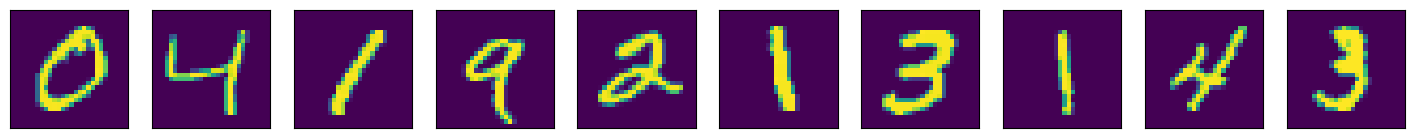

In [187]:
fig=plt.figure(figsize=(18, 4))
classes = []
for i in range(1, 11):
    fig.add_subplot(1, 10, i)
    plt.imshow(np.array(mnist_train[i][0]))
    classes.append(mnist_train[i][1])
    plt.xticks([])
    plt.yticks([])
    #plt.subplots_adjust(wspace=0.005, hspace=0.01)
print(classes)

### 2.2 Dataset

Dataset stores the samples and their corresponding labels.  A custom Dataset class must implement three functions: __init__, __len__, and __getitem__

In [188]:
class MnistDataset(Dataset): 
    def __init__(self, mode, raw_data):
        """
        The __init__ function is run once when instantiating the Dataset object
        """
        assert mode in ['train', 'valid', 'test']
        if mode == "train" or mode ==  "valid":
            if mode == "train":
                self.images = raw_data[0][:10000].float()
                self.labels = raw_data[1][:10000].long()
                self.num_samples = len(self.labels)
            else:
                self.images = raw_data[0][10000:12000].float()
                self.labels = raw_data[1][10000:12000].long()
                self.num_samples = len(self.labels)
        else:
            self.images = raw_data[0][:2000].float()
            self.labels = raw_data[1][:2000].long()
            self.num_samples = len(self.labels)
            
    def __len__(self):
        """
        The __len__ function returns the number of samples in our dataset.
        """
        return self.num_samples
    
    def __getitem__(self, index):
        """
        The __getitem__ function loads and returns a sample from the dataset at the given index
        """
        image, label = self.images[index], self.labels[index]    
        return image, label

In [189]:
mnist_raw_train = [[],[]]
mnist_raw_test = [[],[]]
for img, label in mnist_train: 
  mnist_raw_train[0].append(np.array(img))
  mnist_raw_train[1].append(label)
for img, label in mnist_test: 
  mnist_raw_test[0].append(np.array(img))
  mnist_raw_test[1].append(label)

mnist_raw_train[0] = torch.tensor(mnist_raw_train[0])
mnist_raw_train[1] = torch.tensor(mnist_raw_train[1])

mnist_raw_test[0] = torch.tensor(mnist_raw_test[0])
mnist_raw_test[1] = torch.tensor(mnist_raw_test[1])

### 2.3 DataLoader

In [190]:
mnist_train = MnistDataset(mode='train', raw_data = mnist_raw_train)
mnist_valid = MnistDataset(mode='valid', raw_data = mnist_raw_train)
mnist_test = MnistDataset(mode='test', raw_data = mnist_raw_test)

In [191]:
batch_size = 16

train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle = True)
valid_loader = torch.utils.data.DataLoader(mnist_valid, batch_size=batch_size, shuffle = False)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle = False)

[tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,

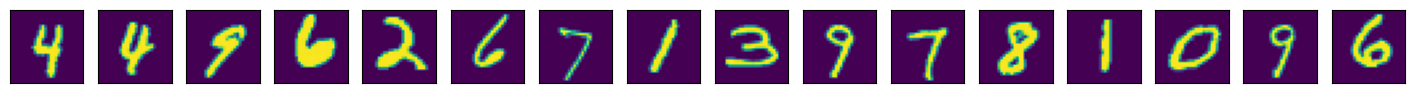

In [192]:
# You can iterate through the data loader
iterator = iter(train_loader)
sample = next(iterator)
print(sample)

# We can also visualize the sample, which should correspond to our definition of dataset 
fig=plt.figure(figsize=(18, 4))
classes = []
for i in range(1, batch_size + 1):
    fig.add_subplot(1, batch_size, i)
    plt.imshow(np.array(sample[0][i-1]))
    classes.append(sample[1][i-1])
    plt.xticks([])
    plt.yticks([])
    #plt.subplots_adjust(wspace=0.005, hspace=0.01)
print(classes)

# 3.Build MLP Classifer

The torch.nn namespace provides all the building blocks you need to build your own neural network.

In [193]:
import torch.nn as nn

### 3.1 Model Layers

In [194]:
# The linear layer is a module that applies a linear transformation on the input using its stored weights and biases.
layer = nn.Linear(in_features = 16, out_features = 5)

In [195]:
# these weights are expressed as instances of torch.nn.Parameter. The Parameter class is a subclass of torch.Tensor
layer.weight.shape

torch.Size([5, 16])

In [196]:
rand_input = torch.randn((10,16))
output = layer(rand_input)
print(output)
print(output.shape)

tensor([[-0.5553,  1.0900,  0.3844,  1.0501,  0.0204],
        [-1.1986, -0.0912, -0.5774, -0.2859, -0.0779],
        [ 0.5956,  0.7477, -0.5841,  0.3798,  0.1713],
        [-0.6535,  0.2618, -0.1188,  0.6554, -1.4037],
        [-0.2525,  0.6736, -0.2063, -0.1582, -0.9762],
        [ 0.5380,  0.2758,  0.0420,  0.0087,  0.1590],
        [ 2.3108,  1.5521,  0.4291,  1.0447,  0.0567],
        [ 0.3480, -0.2333,  0.4315,  0.9315, -1.0828],
        [ 1.2553,  0.9192,  0.5711,  0.2110,  0.1440],
        [ 0.1402, -1.3244,  0.0628,  0.0679, -0.9695]],
       grad_fn=<AddmmBackward0>)
torch.Size([10, 5])


In [197]:
# Non-linear activations create the complex mappings between the model’s inputs and outputs.
activation = nn.ReLU() # nn.Sigmoid() # Tanh()

Text(0, 0.5, 'y')

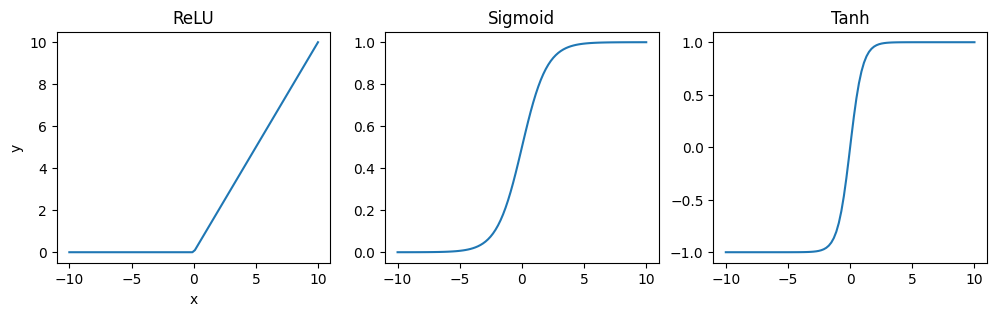

In [198]:
x = torch.linspace(-10, 10, 100)

relu = torch.nn.ReLU()
sigmoid = torch.nn.Sigmoid()
tanh = torch.nn.Tanh()

y_relu = relu(x).numpy()
y_sigmoid = sigmoid(x).numpy()
y_tanh = tanh(x).numpy()

# Create a 1x3 grid of subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))

# Plot the activation functions in separate subplots
axs[0].plot(x.numpy(), y_relu)
axs[0].set_title('ReLU')
axs[1].plot(x.numpy(), y_sigmoid)
axs[1].set_title('Sigmoid')
axs[2].plot(x.numpy(), y_tanh)
axs[2].set_title('Tanh')

# Add axis labels to the first subplot
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')


In [199]:
activation(output)

tensor([[0.0000, 1.0900, 0.3844, 1.0501, 0.0204],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5956, 0.7477, 0.0000, 0.3798, 0.1713],
        [0.0000, 0.2618, 0.0000, 0.6554, 0.0000],
        [0.0000, 0.6736, 0.0000, 0.0000, 0.0000],
        [0.5380, 0.2758, 0.0420, 0.0087, 0.1590],
        [2.3108, 1.5521, 0.4291, 1.0447, 0.0567],
        [0.3480, 0.0000, 0.4315, 0.9315, 0.0000],
        [1.2553, 0.9192, 0.5711, 0.2110, 0.1440],
        [0.1402, 0.0000, 0.0628, 0.0679, 0.0000]], grad_fn=<ReluBackward0>)

### 3.2 Define the model

this simple model shows the fundamental structure of a pytorch model

In [200]:
class MLP_Classifier(torch.nn.Module):
    def __init__(self, input_dim, n_classes, hidden_dim):
        super(MLP_Classifier, self).__init__() #Refers to the fact that this is a subclass of nn.Module and is inheriting all methods
        """
        the __init__() method that defines the layers and other components
        """ 
        self.model = torch.nn.Sequential( #an ordered container of modules
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
        )   

        # you can also do
        # self.layer1 = nn.Linear(input_dim, hidden_dim)
        # self.layer2 = nn.Linear(input_dim, hidden_dim)
        # ...
        # self.relu = nn.ReLU()
        
    def forward(self, x): #You never have to call model.forward(x)
        """
        the forward function is where computatioin gets done
        """
        x = x.reshape(x.shape[0], -1)
        
        out = self.model(x)    

        # if you defined each layers, maybe you need to do something like:
        # x = self.layer1(x)
        # x = self.relu(x)
        # x = self.layer2(x)
        # x = self.relu(x)

        return out

In [201]:
model = MLP_Classifier(input_dim = 28*28, n_classes = 10, hidden_dim = 64)

In [202]:
model

MLP_Classifier(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
  )
)

In [203]:
#We can then "call" thee model like a function

rand_input = sample[0]
print(rand_input.shape)
output = model(rand_input)
print(output.shape)
print(output[0])

torch.Size([16, 28, 28])
torch.Size([16, 64])
tensor([-15.0473,   0.0712,  15.0300,  -8.5828, -36.8583,  14.5408,  -5.6725,
         -6.9015,   5.5626, -21.0529, -26.0434, -29.6189, -21.5657,  17.2868,
         14.1284,   4.0013, -12.2188, -25.6486,  -5.3737,   1.8940,  28.4949,
         19.4473,   0.0431,   5.0822,  -7.1855, -20.9589,  17.3554, -26.5983,
        -20.8224,  16.5246,  -2.2164,  36.8063,  -0.1707, -19.8928, -10.3727,
         13.5088,   4.9668,   5.8271,  -2.1700,  29.2324,  -5.8186, -14.5042,
         22.1294, -18.9651,   5.0487,  19.4918,   6.7263, -21.1245,  -5.0145,
        -10.4460,   2.7658,  -6.7577,  -6.3363,   9.6928,   4.5651,   3.8938,
         -6.6662,  28.7463,  -6.7844, -32.3059, -10.4758,  16.7771,  -2.8822,
        -11.6164], grad_fn=<SelectBackward0>)


In [204]:
# This contains all the parameters that you need pass to the optimizers. 
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0196, -0.0080,  0.0197,  ..., -0.0180,  0.0123, -0.0088],
         [-0.0190,  0.0120, -0.0129,  ..., -0.0203,  0.0285,  0.0196],
         [-0.0308,  0.0012, -0.0142,  ..., -0.0216,  0.0193, -0.0141],
         ...,
         [-0.0080, -0.0126, -0.0183,  ..., -0.0142,  0.0165,  0.0279],
         [-0.0068,  0.0085, -0.0036,  ..., -0.0229, -0.0226,  0.0290],
         [ 0.0337, -0.0109, -0.0214,  ..., -0.0243,  0.0220,  0.0346]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0323,  0.0324,  0.0281,  0.0135,  0.0271, -0.0233, -0.0150, -0.0011,
          0.0298, -0.0332,  0.0116, -0.0029, -0.0015, -0.0312, -0.0014, -0.0264,
          0.0317, -0.0253, -0.0355, -0.0306,  0.0166,  0.0156, -0.0238, -0.0064,
          0.0048, -0.0297,  0.0085,  0.0118, -0.0191, -0.0080,  0.0239, -0.0264,
         -0.0317, -0.0007, -0.0071, -0.0314, -0.0074, -0.0154, -0.0088,  0.0349,
         -0.0006,  0.0240,  0.0235,  0.0340,  0.0296, -0.0112,  0.0224,  0.0305

# 4.Loss Functions

Recall that Pytorch can do gradient calculations for us, and as our input, output and model parameters are all tensors, we can easily calculate the gradient of the output with respect to any weight/bias of the model to conduct gradient descent. However, since our output is currently a batch of vectors, calculating gradient may be tricky. If we can find a loss that produces a scalar, the gradient can be easily caluclated by pytorch. 

Loss function measures the degree of dissimilarity of obtained result to the target value, and it is the loss function that we want to minimize during training. For example, recall we minimize $\sum_{x,y} -y log(f(x)) - (1-y) log(1-f(x))$ during logistic regression, where x,y are inputs and ouput, and f is our classifier function. 

One limitation of logistic regression is that it is made for classifying only 2 classes: "the class", and "not the class". In the MNist case, we have multiple (10) classes, and we need to find a more "generalized" loss to minimize. Cross Entropy Loss is such a loss, and is commonly used in classification tasks. We will conver more about this loss in future lectures. 

Very briefly and informally, the cross entropy loss is $\sum_{c \in C} -y_{c} log(f(x)_{c})$, where the summation over $c \in C$ is the summation over all the classes, and $y_{c}$ is a binary indicator, which is 1 when the class of observation x is c and 0 if the class is not c, and $f(x)_{c}$ is the output of our classifier for class c. Recall the outputs of sigmoid function can be intepreted as probabilties of an input is belonging to a class, we also need to do the same thing when using cross entropy so that $f(x)_c$ can be intepreted roughly as the probability of input x belonging to c. We do so by applying a softmax function, which is a "generalized sigmoid" funciton that takes in multiple inputs, and map each of the values such that
- Each value is between 0 and 1, 
- All the output values sum up to 1, 
- The larger values will still be larger. 

The softmax function for an observation $x_i$ is $\frac{e^{f(x_i)}}{\sum_{j=1}^{C} e^{f(x_i)}}$.

TL;DR: We first apply the softmax function to the output of our model, and then we calculate the cross entropy loss which we mimimize for the classification task. 

In [205]:
# In pytorch, CrossEntropyLoss is a modified version that includes a soft-max function in its formulation, 
# so you only need to feed in the raw activation of your output layer and the class labels

# Input shape (N, C), Target shape (N) Class indices in the range [0, C)[0,C) where C is the number of classes.
# return a single value for whole batch. 
loss_function = torch.nn.CrossEntropyLoss()

target = sample[1]
print(target) 
print(output.shape)

#calculate the loss 
loss = loss_function(output, target)
print(loss)

tensor([4, 4, 9, 6, 2, 6, 7, 1, 3, 9, 7, 8, 1, 0, 9, 6])
torch.Size([16, 64])
tensor(50.4926, grad_fn=<NllLossBackward0>)


In [206]:
# Now we can backprop on the loss easily wihtout any additional steps.
loss.backward()
print(model.model[0].weight.grad)
# Remake the model to have clean gradients
model = MLP_Classifier(input_dim = 28*28, n_classes = 10, hidden_dim = 64)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


# 5. Training

### 5.1 Optimizer

Recall that we can use the gradient of the loss with respect to each model parameter to conduct gradient descent in order to minimize the loss. This process can be tedious, but luckily pytorch can also handle this for us. 

In [207]:
learning_rate = 1e-3

# torch.optim contains all kinds of optimizer. SGD stands for stochastic gradient descent 
# All the optimizers have to be initialized with the model.parameters(). 
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

# there are other options, such as torch.optim.Adam, feel free to search pytorch documentation for details 

### 5.2 Train and Validation Looop

when you start training your model, you need to have a function the train your model on your training set and a function to evaluate your model on the validation set.

In [208]:
def train_epoch(train_loader, model, optimizer, loss_function):
    losses = []
    # get a batch of training data from the train_loader (DataLoader obj)
    for i, (x, t) in enumerate(train_loader):

        # make predictions for this batch
        y = model(x)
        
        # Compute the loss
        loss = loss_function(y, t)
        
        # Backpropagation
        # zero out the gradients so that it will not accumulate through each iteration
        optimizer.zero_grad()
        
        # Compute the gradents with the backward call (backprop)
        loss.backward()
        
        # Update weight using gradient descent 
        optimizer.step()
        
        losses.append(loss.item())
    return np.mean(losses)

def eval_epoch(valid_loader, model, loss_function):
    total = 0
    correct = 0
    preds = []
    trues = []
    
    with torch.no_grad(): 
        for i, (x, t) in enumerate(valid_loader):
            
            # Compute prediction
            y = model(x)
            
            # You can use softmax here, but piking the max value also works in 
            # simple classification tasks using simple networks 
            _, prediction = torch.max(y.data, 1)
            
            total += t.shape[0]
            correct += (prediction == t).sum().item()
            preds.append(y.data.numpy())
            trues.append(t.data.numpy())
            
    return correct/total*100., np.concatenate(preds), np.concatenate(trues)

In [209]:
total_epochs = 20
train_accs, valid_accs = [], []
max_acc = 0
for epoch in range(total_epochs):
    
    model.train() # gradient tracking is on
    
    train_loss = train_epoch(train_loader, model, optimizer, loss_function)

    model.eval() # we don't need gradients on to do reporting
    
    train_acc, train_preds, train_trues = eval_epoch(train_loader, model, loss_function)
    valid_acc, valid_preds, valid_trues = eval_epoch(valid_loader, model, loss_function)

    train_accs.append(train_acc)
    valid_accs.append(valid_acc)
 
    print(f"Epoch: {epoch+1}, Train Loss: {train_loss:>0.4f}, Train Accuracy: {train_acc:>0.2f}%, Validation Accuracy: {valid_acc:>0.2f}% \n")

Epoch: 1, Train Loss: 1.2815, Train Accuracy: 86.38%, Validation Accuracy: 83.60% 

Epoch: 2, Train Loss: 0.4510, Train Accuracy: 90.52%, Validation Accuracy: 88.05% 

Epoch: 3, Train Loss: 0.3168, Train Accuracy: 91.38%, Validation Accuracy: 87.70% 

Epoch: 4, Train Loss: 0.2624, Train Accuracy: 94.18%, Validation Accuracy: 90.40% 

Epoch: 5, Train Loss: 0.2113, Train Accuracy: 94.58%, Validation Accuracy: 90.35% 

Epoch: 6, Train Loss: 0.1851, Train Accuracy: 95.61%, Validation Accuracy: 90.65% 

Epoch: 7, Train Loss: 0.1511, Train Accuracy: 96.45%, Validation Accuracy: 90.90% 

Epoch: 8, Train Loss: 0.1334, Train Accuracy: 96.42%, Validation Accuracy: 91.05% 

Epoch: 9, Train Loss: 0.1184, Train Accuracy: 97.21%, Validation Accuracy: 92.10% 

Epoch: 10, Train Loss: 0.0998, Train Accuracy: 97.23%, Validation Accuracy: 92.20% 

Epoch: 11, Train Loss: 0.0913, Train Accuracy: 97.87%, Validation Accuracy: 91.55% 

Epoch: 12, Train Loss: 0.0898, Train Accuracy: 97.16%, Validation Accuracy

# 6. Evaluation

In [210]:
test_acc, test_preds, test_trues = eval_epoch(test_loader, model, loss_function)
print(f"test_acc Accuracy: {test_acc:>0.2f}% \n")

test_acc Accuracy: 90.35% 



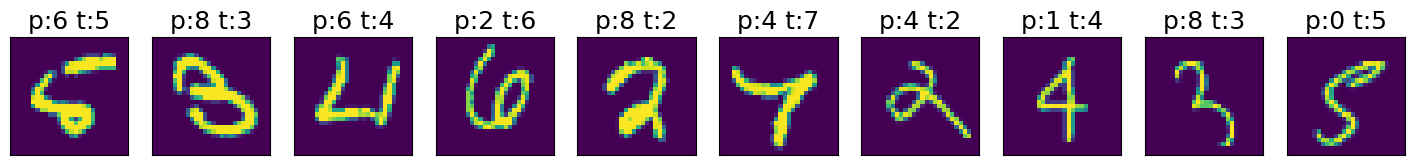

In [218]:
# look at wrong predictions
test_preds = np.argmax(test_preds, 1)
misclassified1 = np.where(test_preds != test_trues)[0]
imgs = torch.cat([x for x, y in test_loader], dim = 0)

fig=plt.figure(figsize=(18, 4))
for i in range(1, 2):
    for j in range(1, 11):
        fig.add_subplot(1, 10, j)
        plt.imshow(imgs[misclassified1[j-1]])
        plt.title("p:"+str(test_preds[misclassified1[j-1]]) + " t:"+str(test_trues[misclassified1[j-1]]), size = 18)
        plt.xticks([])
        plt.yticks([])
        #plt.subplots_adjust(wspace=0.005, hspace=0.01)
  

# 7. Save and Load Models

Saving your work is essential. The awesome model that we made above is only saved in memory and will be lost when the program terminates. 

In [212]:
new_model = MLP_Classifier(input_dim = 28*28, n_classes = 10, hidden_dim = 64)
test_acc, test_preds, test_trues = eval_epoch(test_loader, new_model, loss_function)
print(f"test_acc Accuracy: {test_acc:>0.2f}% \n")

test_acc Accuracy: 5.00% 



In [213]:
model.state_dict()

OrderedDict([('model.0.weight',
              tensor([[ 0.0301, -0.0057,  0.0294,  ..., -0.0108,  0.0347,  0.0011],
                      [-0.0161,  0.0211,  0.0126,  ..., -0.0287,  0.0145,  0.0115],
                      [-0.0241, -0.0344,  0.0186,  ...,  0.0073, -0.0092, -0.0187],
                      ...,
                      [-0.0345,  0.0342, -0.0072,  ...,  0.0191, -0.0200,  0.0044],
                      [-0.0064, -0.0151, -0.0327,  ..., -0.0098, -0.0176, -0.0019],
                      [ 0.0173, -0.0225,  0.0004,  ..., -0.0282, -0.0199,  0.0033]])),
             ('model.0.bias',
              tensor([-0.0094, -0.0090, -0.0245,  0.0192, -0.0070, -0.0153, -0.0153,  0.0099,
                      -0.0271, -0.0120, -0.0015, -0.0043,  0.0351, -0.0274, -0.0226, -0.0201,
                      -0.0269,  0.0258,  0.0013, -0.0020,  0.0196,  0.0262,  0.0187,  0.0186,
                       0.0316, -0.0310, -0.0131,  0.0173, -0.0283, -0.0024, -0.0318, -0.0151,
                       0.026

In [214]:
import os 
os.makedirs('./saves/', exist_ok=True)
torch.save(model.state_dict(), './saves/model_weights.pth')

In [215]:
# make sure the model is has the same "structure" so that the "weights" can be filled in.
new_model.load_state_dict(torch.load('./saves/model_weights.pth'))

<All keys matched successfully>

In [216]:
new_model

MLP_Classifier(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
  )
)

In [217]:
test_acc, test_preds, test_trues = eval_epoch(test_loader, new_model, loss_function)
print(f"test_acc Accuracy: {test_acc:>0.2f}% \n")

test_acc Accuracy: 90.35% 

